<a href="https://colab.research.google.com/github/guptamanishacs/manisha80/blob/main/T080_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
df_sal = pd.read_csv('insurance.csv')
df_sal.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_sal.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


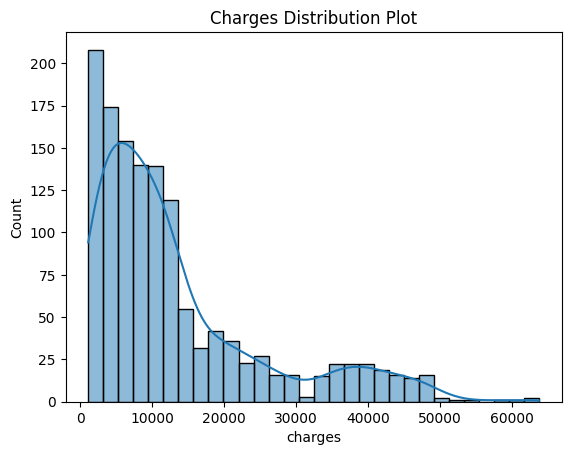

In [5]:
plt.title('Charges Distribution Plot')
sns.histplot(df_sal['charges'], kde=True)
plt.show()


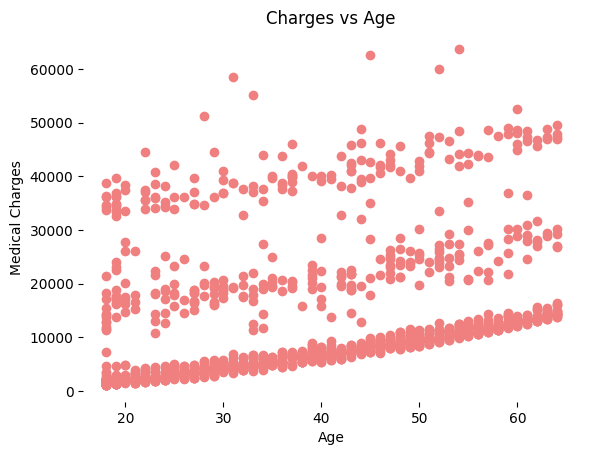

In [6]:
# Charges vs Age plot (same concept as Salary vs Experience)
plt.scatter(df_sal['age'], df_sal['charges'], color='lightcoral')
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.box(False)
plt.show()


In [7]:
X = df_sal.drop('charges', axis=1)   # independent variables
y = df_sal['charges']                # dependent variable


In [9]:
# 1. Encoding categorical columns
df_encoded = pd.get_dummies(df_sal, drop_first=True)

# 2. Splitting into features (X) and target (y)
X = df_encoded.drop('charges', axis=1)   # Independent variables
y = df_encoded['charges']                # Dependent variable

# 3. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Regressor model (THIS IS YOUR CODE, CORRECT)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [10]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

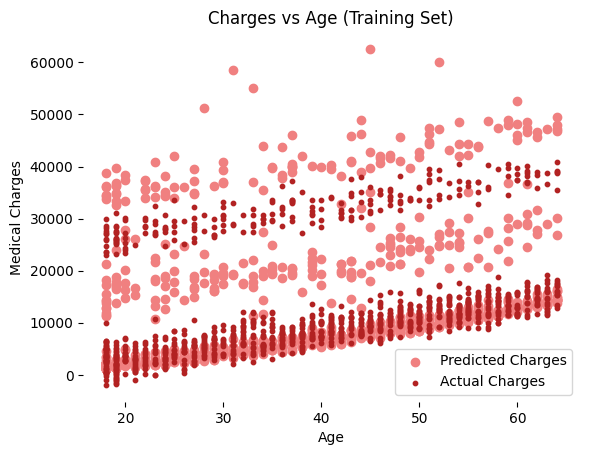

In [11]:
# Training prediction
y_pred_train = regressor.predict(X_train)

# Use ONLY Age column for scatter plot
plt.scatter(X_train['age'], y_train, color='lightcoral')

# Plot prediction line based on Age
plt.scatter(X_train['age'], y_pred_train, color='firebrick', s=10)

plt.title('Charges vs Age (Training Set)')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend(['Predicted Charges', 'Actual Charges'])
plt.box(False)
plt.show()


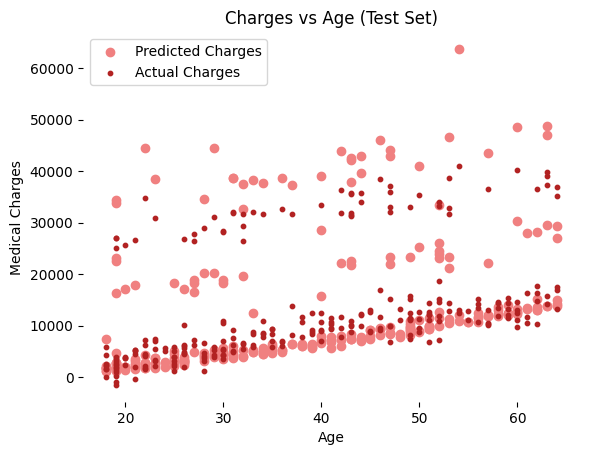

In [13]:
# Test prediction
y_pred_test = regressor.predict(X_test)

# Scatter plot using ONLY Age column
plt.scatter(X_test['age'], y_test, color='lightcoral')

# Plot predicted charges
plt.scatter(X_test['age'], y_pred_test, color='firebrick', s=10)

plt.title('Charges vs Age (Test Set)')
plt.xlabel('Age')
plt.ylabel('Medical Charges')

plt.legend(['Predicted Charges', 'Actual Charges'])
plt.box(False)
plt.show()


In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [19]:
# Assuming the file is 'insurance.csv'
df_insurance = pd.read_csv("insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


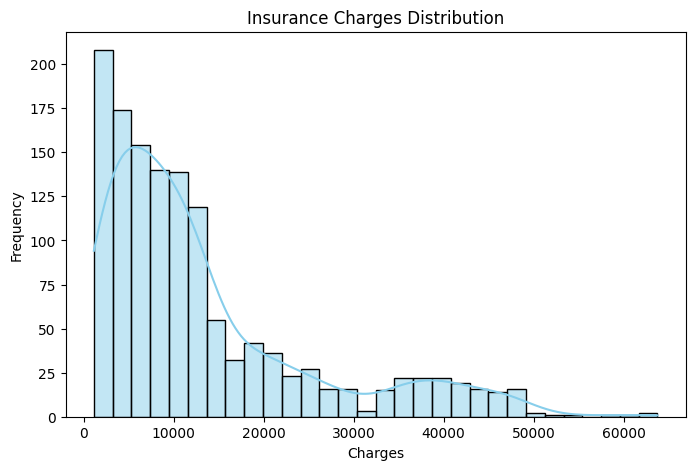

In [22]:
plt.figure(figsize=(8,5))
plt.title('Insurance Charges Distribution')
sns.histplot(df_insurance['charges'], kde=True, color='skyblue', bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

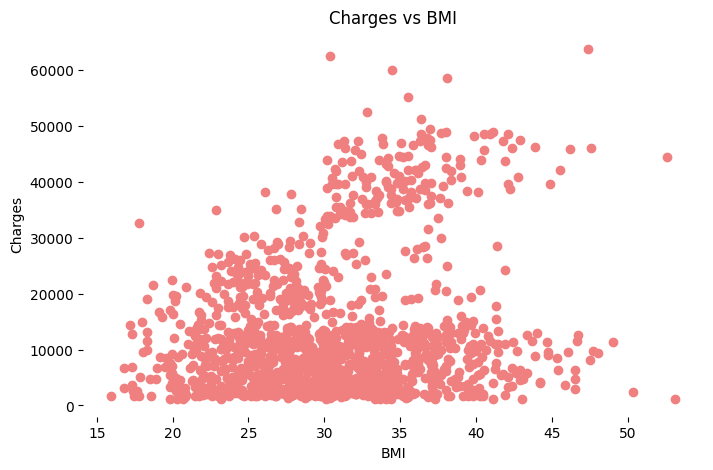

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(df_insurance['bmi'], df_insurance['charges'], color='lightcoral')
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.box(False)
plt.show()

In [25]:
df_insurance = pd.read_csv("insurance.csv")  # Use the exact uploaded file name

# Split dataset into features and target
X = df_insurance.iloc[:, :-1].values   # All columns except 'charges'
y = df_insurance.iloc[:, -1].values    # 'charges' column

# One-hot encoding of categorical columns: 'sex', 'smoker', 'region'
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1, 4, 5])],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1338, 11)
Shape of y: (1338,)


In [26]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict result
y_pred = regressor.predict(X_test)


In [28]:
df = pd.read_csv("insurance.csv")
X = ColumnTransformer([('enc', OneHotEncoder(), [1,4,5])], remainder='passthrough').fit_transform(df.iloc[:,:-1])
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_pred = LinearRegression().fit(X_train,y_train).predict(X_test)
np.set_printoptions(precision=2)
print(np.c_[y_pred,y_test])

[[1.12e+04 9.72e+03]
 [9.49e+03 8.55e+03]
 [3.82e+04 4.57e+04]
 [1.63e+04 1.30e+04]
 [6.91e+03 9.64e+03]
 [3.96e+03 4.50e+03]
 [1.58e+03 2.20e+03]
 [1.44e+04 1.14e+04]
 [9.01e+03 7.54e+03]
 [7.51e+03 5.43e+03]
 [4.49e+03 6.75e+03]
 [1.03e+04 1.05e+04]
 [8.80e+03 7.34e+03]
 [3.80e+03 4.19e+03]
 [2.79e+04 1.83e+04]
 [1.07e+04 1.07e+04]
 [1.13e+04 1.25e+04]
 [6.11e+03 3.49e+03]
 [8.24e+03 6.46e+03]
 [2.71e+04 3.35e+04]
 [3.36e+04 2.40e+04]
 [1.44e+04 1.26e+04]
 [1.17e+04 2.30e+04]
 [3.21e+04 2.31e+04]
 [4.17e+03 1.67e+03]
 [9.25e+03 4.67e+03]
 [1.08e+03 3.73e+03]
 [9.80e+03 7.68e+03]
 [3.77e+03 3.76e+03]
 [1.04e+04 8.41e+03]
 [9.01e+03 8.06e+03]
 [4.01e+04 4.90e+04]
 [1.57e+04 1.30e+04]
 [1.39e+04 2.06e+04]
 [2.48e+04 1.46e+04]
 [5.17e+03 4.14e+03]
 [1.26e+04 8.35e+03]
 [3.08e+04 5.12e+04]
 [3.35e+04 4.00e+04]
 [3.67e+03 1.88e+03]
 [3.98e+03 5.46e+03]
 [3.99e+03 2.87e+03]
 [3.05e+04 2.01e+04]
 [3.95e+04 4.75e+04]
 [2.78e+04 3.61e+04]
 [5.09e+03 2.60e+04]
 [1.06e+04 1.97e+04]
 [7.83e+03 6.